# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [87]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
# visualization
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# init seaborn
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 1}                  
sns.set_context("paper", font_scale=1.5, rc = paper_rc)

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [88]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [89]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [47, 93, 184, 267]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,44466,54259,55571,7782,24171,6465
1,11314,3090,2062,35009,71,2698
2,327,918,4710,74,334,11
3,20893,1222,2576,3975,737,3628


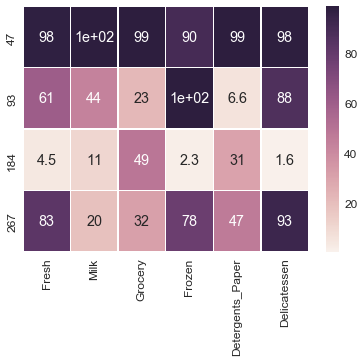

In [90]:
# let us plot heatmap for chosen customers to see in which percentile
# their spending in each category falls. based on their spending pattern, 
# we will be able to label each customer as deli or retail etc

# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)

# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)

# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]

# Now, create the heat map using the seaborn library
_=sns.heatmap(percentiles, vmin=1, vmax=99, annot=True, linewidths=.5)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**

Aha! By looking at the location of the sample customers on the heatmap, we can now easily label each customer:

|Customer|Label|Explanation|
|---------|-----|-----------|
|Customer 47|Super market|Buys everything from Milk and Grocery to Paper and Deli in 99% range. Big spender|  
|Customer 93|Deli shop|Buys Frozen,Deli(above 4Q), Fresh,Milk(near mean), Det,Paper,Grocery(1Q). Typical of sandwich seller's purchase pattern.|
|Customer 184|Small Market|Buys primarily dry Grocery,Det,Paper(in 2Q), all other (1Q). Not a big spender |
|Customer 267|Restaurant| Buys Deli,Fresh,Frozen(4Q) and Grocery,Det,Paper(2Q), Milk(1Q). Typical of food serving purchasing pattern.|

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [91]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split

# let us iterate over each feature and find out whether selected feature 
# has any coorelation with other features
scores = []
for selected_feature in data.columns.values:

    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop(selected_feature, axis=1)

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[selected_feature], 
                                                    test_size=0.25, random_state = 42)

    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state = 42)
    regressor = regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)

    d = {
        'Selected Feature': selected_feature,
        'Score': float("{:.4f}".format(score))
        }
    
    scores.append(pd.Series(d))
    
# create df of scores to report
scores_df = pd.DataFrame(scores, columns=['Selected Feature', 'Score'])
scores_df.sort_values(["Score"], ascending = False, inplace = True)

display(scores_df)


,Selected Feature,Score
2,Grocery,0.6819
4,Detergents_Paper,0.2717
1,Milk,0.1563
3,Frozen,-0.2101
0,Fresh,-0.3857
5,Delicatessen,-2.2547


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**

- Rather than selecting just one feature, I chose to iterate over each feature in the data to study each feature's impact on the outcome. 

- Prediction scores are reported in the table above. Scores have been sorted in descendig order for easier inference.

- "Grocery", "Detergents_Paper" & "Milk" have +ve scores - Means values for these features can be 'somewhat' predicted by all other features. That been said, respective scores are no where near 1, hence I would not go as far as dropping any one of them from the dataset. Are these three features necessary for identifying customers' spending habits? Yes. If anything, "Grocery" with highest Score is the only candidate that might be considered to be ignored, but I wouldn't.

- "Frozen", "Fresh" & "Delicatessen" have -ve scores - Means our model failed to fit the data here. So nothing can be said conclusively about these three features at this point.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

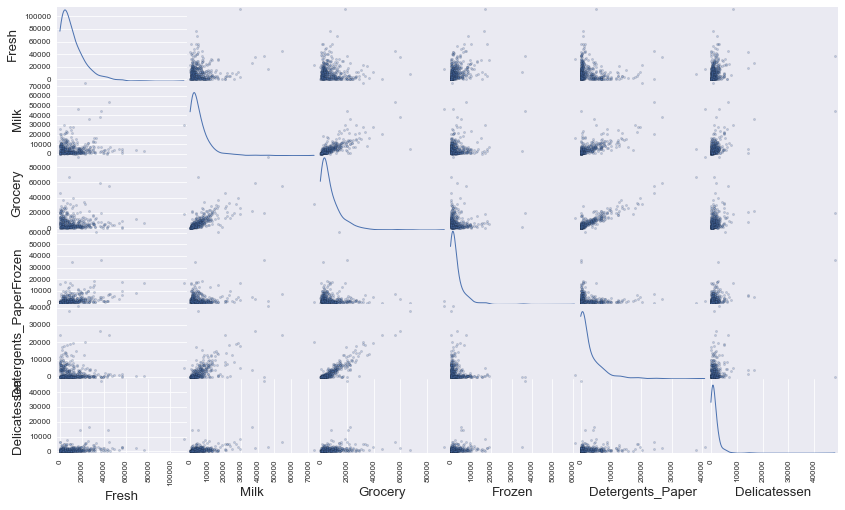

In [92]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation

Aha! Our previous analysis is spot on. Scatter Matrix confirms our previous conclusion. 

- "Grocery" has +ve corelation with "Detergents_Paper" & "Milk"

- All other graphs seems to have no pattern. So there is no corelation between those features.

- None of the features have -ve corelation with any other feature.

Take away:

"Grocery" is the only feature that has somewhat chance to get dropped, because it can be somewhat predicted by "Detergents_Paper" & "Milk"



### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**

- Yes, "Grocery" has +ve corelation with "Detergents_Paper" & "Milk"

- This confirms our initial analysis about the relevance of features in the dataset

- Data for all the features is normally distributed, but positively skewed. This can be observed in the diagonal of the Scatter Matrix, which is plotting Kernel Density Estimate (KDE). KDE follows Histogram.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

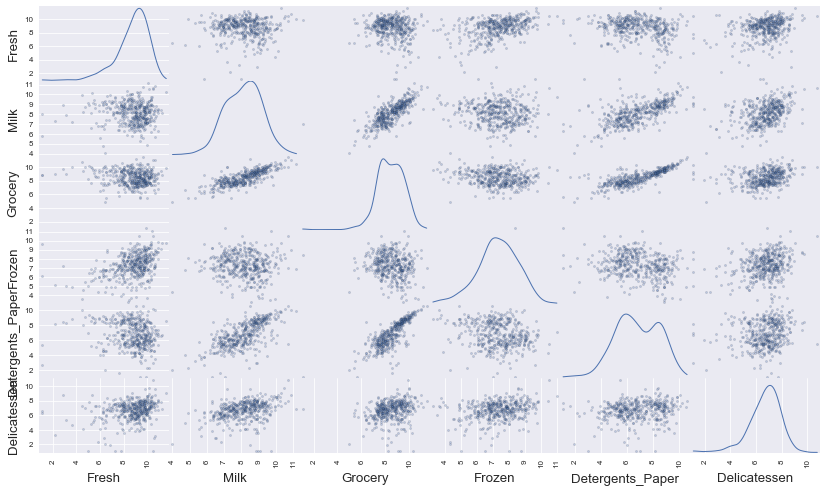

In [93]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

**Answer:**
- Yes, after applying log scaling to the data, the distribution of each feature is much fatter (and hence much more normal). There are now two bimodal distributions also.

- Yes, "Grocery" still has +ve corelation with "Detergents_Paper" & "Milk" .. and it is definitely much darker (and hence much strongly corelated).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [94]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.702480,10.901524,10.925417,8.959569,10.092909,8.774158
1,9.333796,8.035926,7.631432,10.463360,4.262680,7.900266
2,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
3,9.947169,7.108244,7.853993,8.287780,6.602588,8.196437


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [95]:
# a flag that I use to toggle outlier removal or not
remove_outliers = False

print "Count of Data points in the dataset: {}\n".format(len(log_data))

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    
    outlier = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    # OPTIONAL: Select the indices for data points you wish to remove
    outliers = outliers + list(outlier.index)
    
    print "Count of Data points considered outliers for the feature '{}': {}".format(feature, len(outlier))
    

# Remove the outliers, if any were specified
outliers = sorted(outliers)
unique_outliers = list(set(outliers))

print "\nCount of Unique Outlier Data points: {}".format(len(unique_outliers))

from collections import Counter
duplicate_outliers = sorted([item for item, count in Counter(outliers).items() if count > 1])

print "\nCount of Data points considered outliers for more than one feature: {}".format(len(duplicate_outliers))
print "Index of Data points considered outliers for more than one feature: {}".format(duplicate_outliers)
display(log_data.loc[duplicate_outliers])

# apply outlier removal
if not remove_outliers:
    outliers = []

good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

if remove_outliers:
    print "\nAfter eliminating all Outliers. Count of Good Data Points is: {}".format(len(good_data))
else:
    print "\nOutliers have not been removed because remove_outliers flag is set to: {}".format(remove_outliers)

Count of Data points in the dataset: 440

Count of Data points considered outliers for the feature 'Fresh': 16
Count of Data points considered outliers for the feature 'Milk': 4
Count of Data points considered outliers for the feature 'Grocery': 2
Count of Data points considered outliers for the feature 'Frozen': 10
Count of Data points considered outliers for the feature 'Detergents_Paper': 2
Count of Data points considered outliers for the feature 'Delicatessen': 14

Count of Unique Outlier Data points: 42

Count of Data points considered outliers for more than one feature: 5
Index of Data points considered outliers for more than one feature: [65, 66, 75, 128, 154]


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442



Outliers have not been removed because remove_outliers flag is set to: False


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**

- Yes, 5 Data points are considered outliers for more than one feature. Their row indices are listed above in a table.

- I have decided to not remove any Outliers from the dataset because there is no way for us to know if outlier data point was a mistake (wrong data entry) or customer really spent that much amount in that category. There is no specified limit on the spending in any product category. 

- Although, I have filled 'outliers', 'unique_outliers' & 'duplicate_outliers' lists above.. I have not removed any Outliers from the dataset for the reasons stated above. These lists were filled for analysis purposes. Ultimately, I turned off the flag 'remove_outlier'. Hence no outliers were removed.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

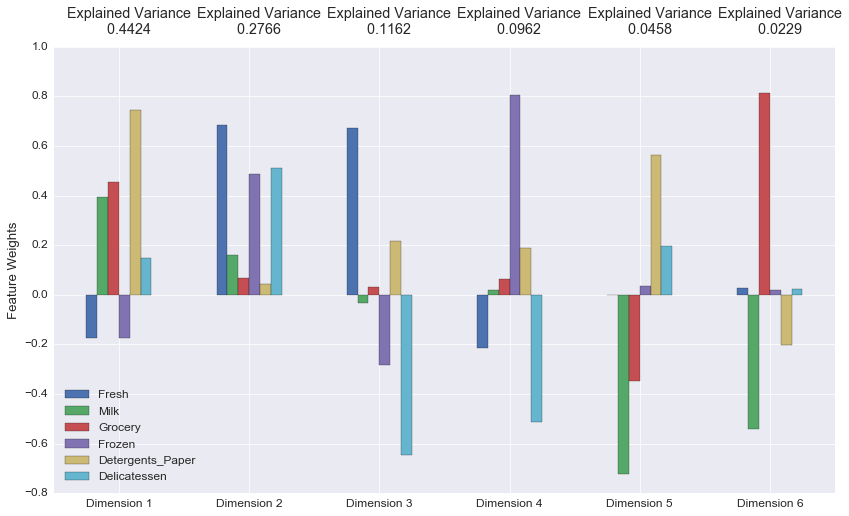

In [96]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6)
pca = pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)


Principal Components are:
[[-0.17371704  0.394463    0.45436364 -0.17219603  0.74551495  0.1494356 ]
 [ 0.68513571  0.16239926  0.06937908  0.487691    0.04191162  0.50970874]
 [ 0.67351166 -0.03306794  0.03218274 -0.28481122  0.21824404 -0.64459672]
 [-0.21432619  0.0185577   0.06448674  0.80608348  0.19005006 -0.51348977]
 [ 0.00082162 -0.72228834 -0.34799325  0.03624337  0.56366476  0.19536639]
 [ 0.02927638 -0.54303508  0.81390826  0.0174477  -0.20244363  0.02283197]]


Total explained variance by first and second principal component: 0.7189
Total explained variance by first four principal components: 0.9313


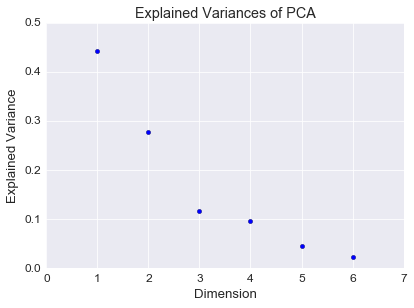

In [97]:
explained_variance = pca.explained_variance_ratio_
components = pca.components_

print "Principal Components are:"
print components
print '\n'

# plot PCA output
n = min(good_data.shape)
plt.scatter(xrange(1, n+1), pca.explained_variance_ratio_)
plt.xlabel('Dimension')
plt.ylabel('Explained Variance')
plt.ylim(0)
plt.title("Explained Variances of PCA")

print "Total explained variance by first and second principal component: {:.4f}".format(
    explained_variance[0] + explained_variance[1])

print "Total explained variance by first four principal components: {:.4f}".format(
    explained_variance[0] + explained_variance[1] +
    explained_variance[2] + explained_variance[3])

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

- Total explained variance by first and second principal component: 0.7189
- Total explained variance by first four principal components: 0.9313
- Visualization analysis - see below:

In our example, the first two principal components account for 44.2% and 27.7% of the variance in the data respectively. In contrast, the third principal component accounts for only 11.6% of the variance. It is clear from the plot above that the explained variance drops off rapidly after the first two components. These results suggest that a total of two principal component dimensions is the ideal number for our data. The first two dimensions explain almost 71.9% of the variance in the data set. Of course we could explain more of the variance by including additional dimensions, but then we run the risk of overfitting. 

The principal component dimensions represent vectors that are linear combinations of the original feature dimensions.  We can think of the six principal component vectors as elements of a principal component matrix. The principal components matrix can be applied to an input feature vector to project it onto the principal component axes. Now for our purposes we can construct a 2x6 principal component matrix that projects a 6-dimensional feature vector onto a 2-dimensional principal component space. This reduced dimensionality principal component space explains sufficient amount of the variance in the data, and thus can substantially reduce the computational workload a clustering algorithm would be asked to perform without sacrificing much in terms of valuable information.

The first principal component dimension reconfirms our initial correlation analysis between 'Grocery', 'Milk' and 'Detergents_Paper'. The first principal component dimension has a coefficient of 0.75 for the 'Detergents_Paper' feature, 0.45 for the 'Grocery' feature and 0.39 for 'Milk' feature. It is pretty obvious that the first principal component is predominantly the 'Detergents_Paper' feature vector. It tells us that customers that buy more 'Detergents_Paper' items tend also to buy more 'Grocery' and 'Milk' items and to some degree more 'Delicatessen' items as well (as they do correlate positively: positive coefficients). We can use this discovery to encourage our wholesale distributor to try to increase sales by marketing these items together.

In second principal component, all features have positive coefficients. 'Fresh' (0.69), 'Frozen' (0.49) and 'Delicatessen' (0.51) are highly correlated. We can use this finding to suggest our wholesale distributor to increase marketing these items together. Although, it is counter-intuitive to see 'Fresh' & 'Frozen' corelated, but that is what these numbers are telling us.

Third principal component has 'Fresh' (0.67) and 'Delicatessen' (-0.64) pegged in opposite direction - indicating customers who buy lot of 'Fresh' do not buy that much of 'Delicatessen'. They are opposite features. Wholesaler/We must investigate this further to find out if some mistake is causing this or this is a general practice. 

Finally, in fourth principal component 'Frozen' (0.80) and 'Delicatessen' (-0.51) are negatively corelated. We must investigate this buying pattern further.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [98]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,4.3780,3.9972,0.2061,0.6713,-0.5351,-0.0226
1,-2.7473,2.4092,-1.8644,1.2519,-0.7226,-0.0010
2,-0.8424,-5.9022,1.4545,0.1970,-0.5617,0.6801
3,-0.9554,1.8822,-0.4740,-0.3435,1.1684,0.1970


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [99]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca = pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = None
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [100]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,4.3780,3.9972
1,-2.7473,2.4092
2,-0.8424,-5.9022
3,-0.9554,1.8822


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**

KMeans Assumptions:
- Works great if clusters are spherical - this means that features within a cluster have equal variance, and also features are independent of each other.
- Assumes balanced cluster size within the dataset and clusters have similar density.
- KMeans can fall in local minima - that is why it can be useful to restart it several times. 

KMeans Advantages:
- Practically works well even when some assumptions are broken.
- The k-means algorithm is very fast, simple and easy to implement.
- It is easy to interpret the clustering results. 
- k-means is fast and efficient in terms of computational cost, typically O(K*n*d).

KMeans Cons:

- KMeans often produce clusters with relatively uniform size even if the input data have different cluster size.
- It is hard to satisfy the spherical assumption. Correlation between features break it, would put extra weights on correlated features (should take actions depending on the problems); cannot find non-convex clusters or clusters with unusual shapes.
- Different densities: may work poorly with clusters with different densities but spherical shape.
- K value not known: how to solve K? 1)for small range of K value, say 2-10, for each K value run lots of times(20-100 times), take the clustering result with the lowest J value among all K values; 2) using Elbow method to decide K value; 3) GAPs; 4)decide the K down streams: decide by the purposes/goals of the projects.
- Sensitive to outliers.
- Sensitive to initial points and local optimal, and there is no unique solution for a certain K value. Thus run KMeans for a K value lots of times(20-100times), then pick the results with lowest J.

Note: Some of the above points adapted from [Quora](https://www.quora.com/What-are-the-advantages-of-K-Means-clustering) discussion.

*Gaussian Mixture Model clustering*

I found following two youtube videos great for gaining intuition about Gaussian Mixture Model clustering.

- https://youtu.be/REypj2sy_5U
- https://youtu.be/iQoXFmbXRJA 

GMM Pros:

- GMM clustering is more flexible because we can view it as a fuzzy or soft clustering method. In kmeans, a point belongs to one and only one cluster, whereas in GMM a point belongs to each cluster to a different degree. The degree is based on the probability of the point being generated from each cluster’s (multivariate) normal distribution, with cluster center as the distribution’s mean and cluster covariance as its covariance. Depending on the task, mixed membership may be more appropriate (e.g. news articles can belong to multiple topic clusters) or not (e.g. organisms can belong to only one species).
- It can accommodate clusters that have different sizes and correlation structures within them. k-means is actually a special case of GMM in which each cluster’s covariance along all dimensions approaches 0. This implies that a point will get assigned only to the cluster closest to it. With GMM, each cluster can have unconstrained covariance structure. Think of rotated and/or elongated distribution of points in a cluster, instead of spherical as in kmeans. As a result, cluster assignment is much more flexible in GMM than in k-means. 

GMM Cons:

- However, the algorithms for optimizing the loss function for GMM are not so trivial, since it is not a convex function. The most popular algorithm is the Expectation Maximization algorithm.

Note: Some of the above points adapted from [Quora](https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm) discussion.

*Which of the two algorithms will you use and why?*

Although, KMeans is fast and easy; it does not seem like a good fit for our project. In the Data Exploration section, we observed that customers fall in various quartiles, including several in Outlier region. We have no idea whether data is spherical. It looks more like overlapping clusters. Gaussian Mixture Models is a better choice, simply because it presumes less than KMeans Clustering about the structure of the data. So this is the model that we will use. 

That been said, we will try both algorithms and checkout our assumptions.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

### Bonus Implementation: Creating Clusters (KMeans)

In [101]:
from sklearn.cluster import KMeans
from sklearn import metrics

# accumulate scores for each varying n_clusters
silhouette_scores = []

best_score = -np.inf
n_clusters = range(2, 11, 1)

for n in n_clusters:

    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n, random_state=42).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = metrics.silhouette_score(reduced_data, preds, random_state=42)

    d = {
        'Algorithm' : "KMeans",
        'Clusters': n,
        'Sorted Silhouette Score': float("{:.4f}".format(score))
        }
    silhouette_scores.append(pd.Series(d))
    
    if score > best_score:
        best_score = score
        
        kmeans_centers = centers
        kmeans_preds = preds
        kmeans_n_cluster = n
           
# create df of silhouette_scores to report
silhouette_scores_df = pd.DataFrame(silhouette_scores, columns=['Algorithm', 'Clusters', 'Sorted Silhouette Score'])
silhouette_scores_df.sort_values(["Sorted Silhouette Score"], ascending = False, inplace = True)

display(silhouette_scores_df)

print "with KMeans best Silhouette Score is {:.4f} for {} Clusters.".format(best_score, kmeans_n_cluster)

,Algorithm,Clusters,Sorted Silhouette Score
0,KMeans,2,0.4192
1,KMeans,3,0.3935
5,KMeans,7,0.3657
4,KMeans,6,0.3606
7,KMeans,9,0.3593
6,KMeans,8,0.3556
8,KMeans,10,0.3508
3,KMeans,5,0.3469
2,KMeans,4,0.3303


with KMeans best Silhouette Score is 0.4192 for 2 Clusters.


### Implementation: Creating Clusters (GMM)

In [102]:
from sklearn.mixture import GMM

# TODO: Apply your clustering algorithm of choice to the reduced data 

# find best gmm - adopted code from this sklearn sample:
# http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#example-mixture-plot-gmm-selection-py

lowest_BIC = np.infty
for n_components in xrange(1,11):
    for covariance_type in ('spherical', 'tied', 'diag', 'full'):
        gmm = GMM(n_components, covariance_type, random_state=42)
        this_clustering = gmm.fit(reduced_data)
        this_BIC = gmm.bic(reduced_data)
        if this_BIC < lowest_BIC:
            lowest_BIC, best_gmm = this_BIC, gmm
            
# found best_gmm
clusterer = best_gmm.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = metrics.silhouette_score(reduced_data, preds, random_state=42)

print "with GMM best Silhouette Score is {:.4f} for {} Clusters.".format(score,  clusterer.n_components)

with GMM best Silhouette Score is 0.4003 for 3 Clusters.


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**

We found 

- with KMeans - best silhouette Score is 0.4192 and it found 2 clusters. *(see details in above table)*
- with GMM - best Silhouette Score is 0.4003 and it found 3 clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

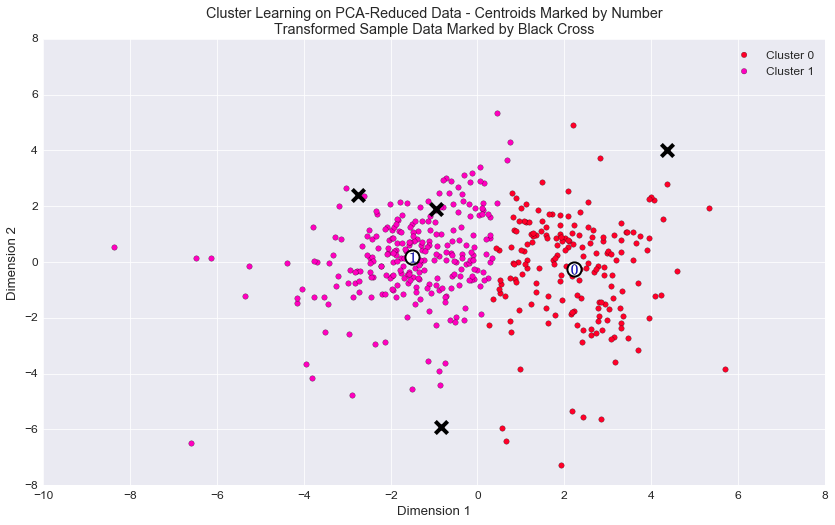

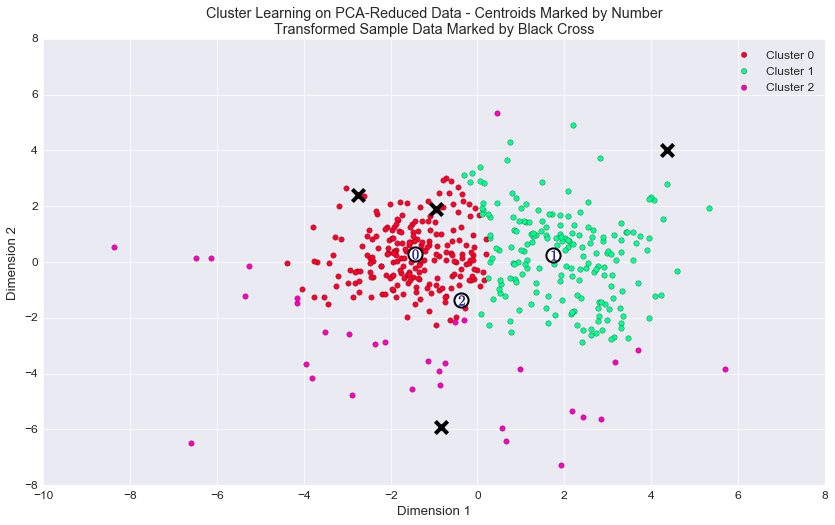

In [103]:
# Display the results of the clustering from implementation

# Note: Here we are plotting results of both algorithms

## kmeans
rs.cluster_results(reduced_data, kmeans_preds, kmeans_centers, pca_samples)

## GMM
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [104]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# Display a description of the dataset
display(data.describe()) # for quick reference

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9700.0,1995.0,2453.0,2189.0,305.0,733.0
Segment 1,5450.0,6995.0,10445.0,1244.0,3298.0,1162.0
Segment 2,2584.0,2314.0,3538.0,811.0,628.0,368.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**

| Segment    | Fresh  | Milk  | Grocery  | Frozen  | Detergents_Paper  | Delicatessen | Establishment Guess         |
|:----------:|:------:|:-----:|:--------:|:-------:|:-----------------:|:------------:|------------------------------|
| Segment 0  | 3Q     | 2Q    | 2Q       | 3Q      | 2Q                | 2Q           | RESTNT - buys lot of Fresh and Frozen, but less Detgnts and Paper. Cooks |
| Segment 1  | 2Q     | 3Q    | 3Q       | 2Q      | 3Q                | 3Q           | HOTEL - buys lot of Milk and Detrgnts. Only Hotels need so much Detrgnts |
| Segment 2  | 1Q     | 2Q    | 2Q       | 2Q      | 2Q                | 2Q           | CAFE - buys very less Fresh and every thing else in less qty. Doesn't cook |
    

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [105]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 2
Sample point 3 predicted to be in Cluster 0


**Answer:**

Based on what we know as the purchasing pattern of the each sample customer (from question 1), and the new defintion of cluster segments that we have formulated just now in question 8, we can categorize each sample customer into a cluster. Following are my best guesses of cluster assignments. I have added an extra column "Cluster" to the table from question 1, so that we can see how our guesses have evolved overtime.


|Customer|Label|Explanation| **Cluster** |
|---------|-----|-----------|------------|
|Cust 47|Super market|Buys everything from Milk and Grocery to Paper and Deli in 99% range. Big spender| **Cluster 1**| 
|Cust 93|Deli shop|Buys Frozen,Deli(above 4Q), Fresh,Milk(near mean), Det,Paper,Grocery(1Q). Typical of sandwich seller's purchase pattern.| **Cluster 0** |
|Cust 184|Small Market|Buys primarily dry Grocery,Det,Paper(in 2Q), all other (1Q). Not a big spender |**Cluster 2**|
|Cust 267|Restaurant| Buys Deli,Fresh,Frozen(4Q) and Grocery,Det,Paper(2Q), Milk(1Q). Typical of food serving purchasing pattern.|**Cluster 1**|

Let us take an example of sample customer 93. We had intially categorized him as a DELI based on his buying pattern - buys lots of Frozen,Deli. but less of det,paper,grocery. This buying pattern closely resembles that of cluster 0 (refer table in Answer 8), which we have labeled HOTEL. Although labels differ little bit, but we have assigned correct cluster label to the customer based on underlying behavior.  Likewise, we can explain remaining customers' cluster assignments in the table above. 

Let us now run the prediction code above. 

It looks like one of my guess for customer 267 does not match with the prediction. All other guesses are consistent with predictions. There is lot of room for subjective interpretaton of data during guess. That is where Unsupervised Machine Learning clustering techniques can come super handy. Without such scientific approach our guess will be all over the place. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

While conducting A/B tests, wholesaler distributor should carefully select his test customers such that they adequately represent each customer segment. Because for example: Small customers (CAFE) may prefer to buy goods in small quantities and frquently because of their cash flow situation and less storage space. On the other hand, large customers (RETAILER) who have warehouses may prefer large quantities and less frequent shipping because that saves some shipping cost. 

We recommend, that Wholesaler conduct separate A/B tests for each customer segment to learn segment's prefrence. Based on the learnt outcome, new delivery service changes should be rolled out or not.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

We can use supervised classification algorithm such as DecisionTree or SVM to classify new customers. We will use current dataset as training data (X_train), and engineered feature 'Customer Segment' column as the training label (y_train) to a classifying learning algorithm. Once the model is trained, we can input new customers (X_input) to predict (y_output) labels.

Target variable would be 'Customer Segment'

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

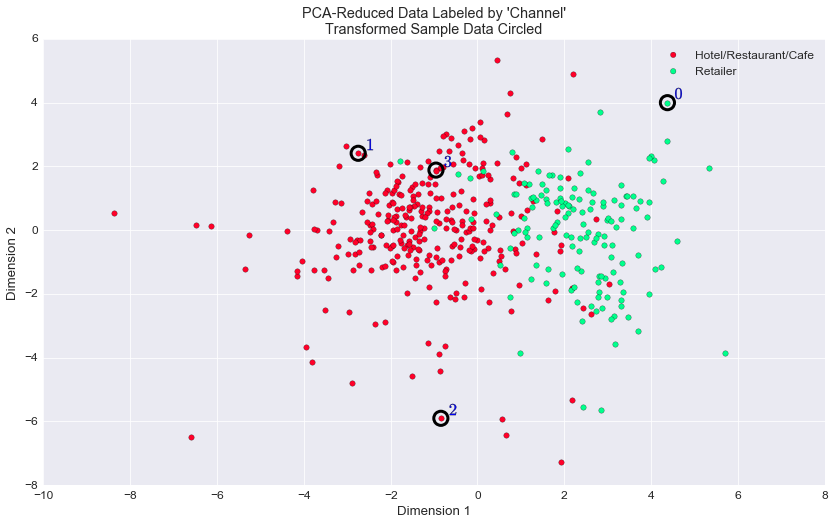

In [106]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**

(bit vague questions. following are answers for my interpretation of questions)

- Yes, this model is consistent with my KMeans model. Both models found 2 underlying customer segments with approximately same segmentation (data point coloring). One difference being, in this model there seems to be some bit of overlapping (red and green dots are mixing near the separation boundary). 

- Yes, all the green datapoints, especially the ones far from separtion boundary are without doubt purely 'Retailer' and vice versa.

- Yes, this classification is consistent with my customer segments. My "samples" are getting same segmentation labels by both models. Hence they are consistent.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.